In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading'

## 20191202 dataset

In [3]:
file=f'{bigDir}\\20191202_new dataset\\signals_new_v6_randomv2.csv'
data=pd.read_csv(file)

In [5]:
data.head()

,Unnamed: 0,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,...,mol_age_mod,nuc_hp1b_total,inner_hp1b_total,outer_hp1b_total,nuc_hp1b_het,inner_hp1b_het,outer_hp1b_het,nuc_hp1b_eu,inner_hp1b_eu,outer_hp1b_eu
0,0,20191203_cell-00.czi,20191125-01-17,191125pcnat_dhbr_cdc6vxy01,678.301,200.931,MCM3,1,HP1beta,2,...,0.444,1.415176e+09,425500564.0,9.896759e+08,550518042.0,321679433.0,228838609.0,8.646584e+08,103821131.0,7.608373e+08
1,1,20191203_cell-01.czi,20191125-01-20,191125pcnat_dhbr_cdc6vxy01,1552.152,240.479,MCM3,1,HP1beta,2,...,1.373,2.175016e+09,804184935.0,1.370831e+09,896267478.0,567124747.0,329142731.0,1.278748e+09,237060188.0,1.041688e+09
2,2,20191203_cell-02.czi,20191125-01-23,191125pcnat_dhbr_cdc6vxy01,1131.436,318.530,MCM3,1,HP1beta,2,...,1.371,1.933001e+09,666820604.0,1.266180e+09,732487366.0,444813519.0,287673847.0,1.200514e+09,222007085.0,9.785064e+08
3,3,20191203_cell-03.czi,20191125-01-25,191125pcnat_dhbr_cdc6vxy01,1650.585,324.968,MCM3,1,HP1beta,2,...,0.208,1.062142e+09,233589820.0,8.285525e+08,403943621.0,187675893.0,216267728.0,6.581987e+08,45913927.0,6.122848e+08
4,4,20191203_cell-04.czi,20191125-01-32,191125pcnat_dhbr_cdc6vxy01,1466.687,426.815,MCM3,1,HP1beta,2,...,0.345,1.717888e+09,546330833.0,1.171557e+09,697150763.0,424718652.0,272432111.0,1.020738e+09,121612181.0,8.991254e+08


<IPython.core.display.Javascript object>


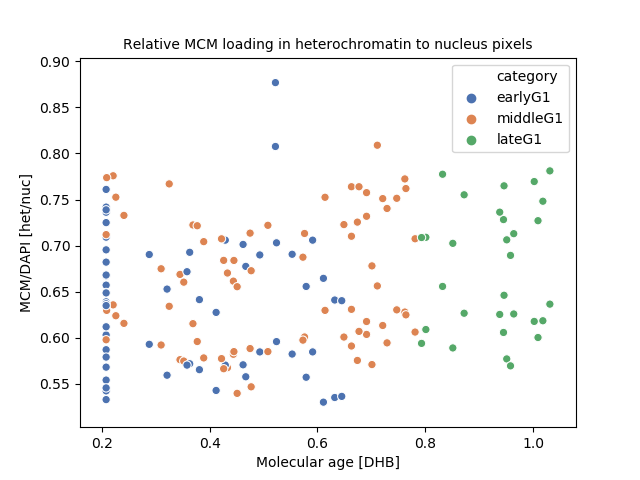

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [6]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


<IPython.core.display.Javascript object>


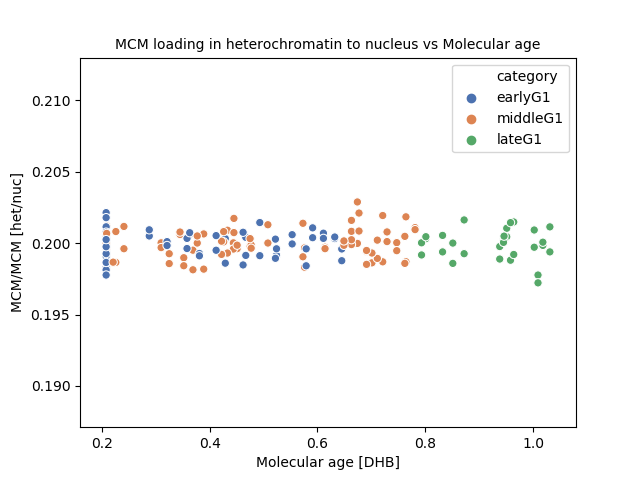

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [7]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

In [8]:
testfile=f'{bigDir}\\20191202_new dataset\\signals_new_v6_random_2.csv'
testdata=pd.read_csv(testfile)

<IPython.core.display.Javascript object>


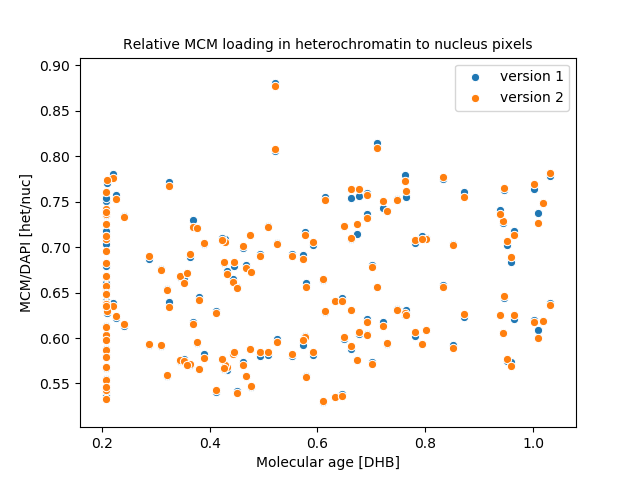

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [12]:
%matplotlib notebook
testdata['temp']=(testdata.nuc_mcm_het/testdata.nuc_DAPI_het)/(testdata.nuc_mcm_total/testdata.nuc_DAPI_total)

data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=testdata.loc[(['G1' in x for x in testdata.category]), :], label='version 1')
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], label='version 2')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


## 200217 dataset

In [52]:
file1=f'{bigDir}\\20200217_geminin\\200217_cellinfo_v9_randomv2.csv'
data1=pd.read_csv(file1)

In [53]:
data1=data1.loc[data1.group=='CTL',:]

In [54]:
data1.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,file,original cell name,movie,x,y,ab1 (MCM),...,mol_age_mod,nuc_hp1b_total,inner_hp1b_total,outer_hp1b_total,nuc_hp1b_het,inner_hp1b_het,outer_hp1b_het,nuc_hp1b_eu,inner_hp1b_eu,outer_hp1b_eu
0,0,0,0,0,20200217_cell_00.ciz,2020024-19-21-63X.czi,20200217pinducer gemininxy19,1312.741,235.893,MCM3,...,0.948,2.693842e+09,9.314778e+08,1.762364e+09,1.339535e+09,8.299883e+08,509546448.0,1.354307e+09,101489496.0,1.252817e+09
1,1,1,1,1,20200217_cell_01.ciz,2020024-19-27-63X.czi,20200217pinducer gemininxy19,1323.444,397.761,MCM3,...,0.465,2.172380e+09,8.241901e+08,1.348189e+09,9.915096e+08,6.602304e+08,331279227.0,1.180870e+09,163959707.0,1.016910e+09
2,2,2,2,2,20200217_cell_02.ciz,2020024-19-39-63X.czi,20200217pinducer gemininxy19,1772.297,584.995,MCM3,...,2.001,3.263571e+09,1.319735e+09,1.943836e+09,1.458153e+09,1.100649e+09,357504422.0,1.805418e+09,219086613.0,1.586331e+09
3,3,3,3,3,20200217_cell_03.ciz,2020024-19-49-63X.czi,20200217pinducer gemininxy19,163.044,727.256,MCM3,...,1.063,2.334174e+09,9.963424e+08,1.337832e+09,1.103680e+09,8.515261e+08,252154253.0,1.230494e+09,144816240.0,1.085678e+09
4,4,4,4,4,20200217_cell_04.ciz,2020024-19-51-63X.czi,20200217pinducer gemininxy19,1791.955,755.367,MCM3,...,0.579,2.112534e+09,6.756199e+08,1.436915e+09,9.837290e+08,5.828320e+08,400897040.0,1.128805e+09,92787952.0,1.036018e+09


<IPython.core.display.Javascript object>


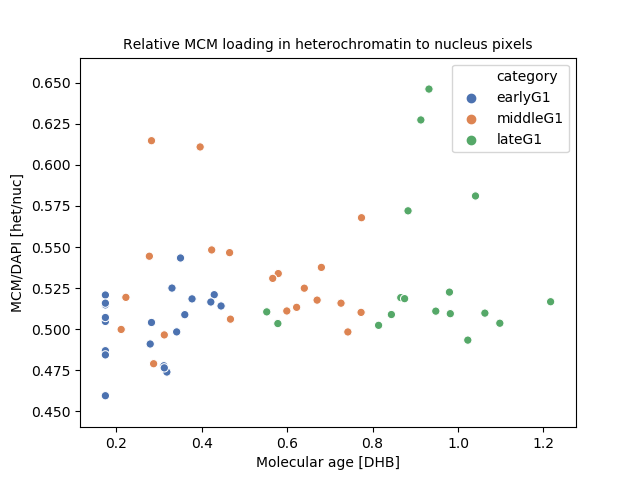

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [55]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_DAPI_het)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


<IPython.core.display.Javascript object>


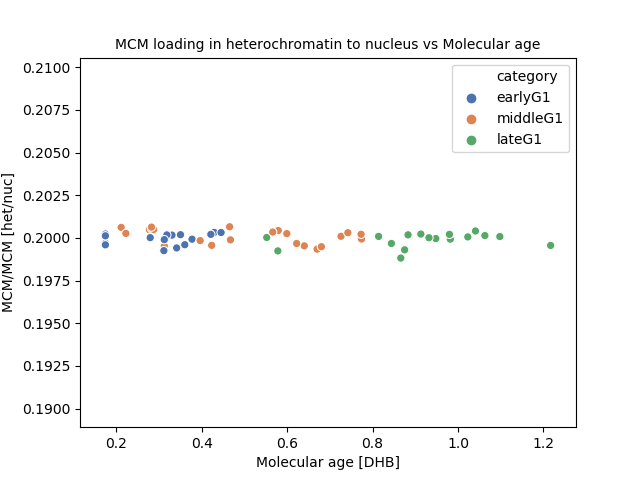

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [21]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

In [56]:
testfile1=f'{bigDir}\\20200217_geminin\\200217_cellinfo_v9_random_v1.csv'
testdata1=pd.read_csv(testfile1)
testdata1=testdata1.loc[testdata1.group=='CTL',:]

<IPython.core.display.Javascript object>


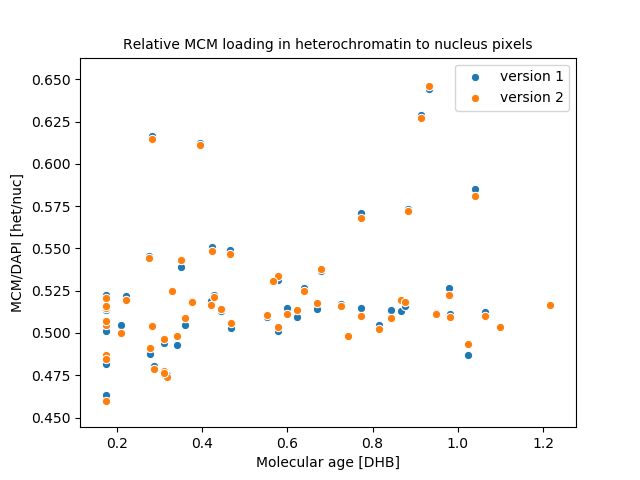

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [57]:
%matplotlib notebook
testdata1['temp']=(testdata1.nuc_mcm_het/testdata1.nuc_DAPI_het)/(testdata1.nuc_mcm_total/testdata1.nuc_DAPI_total)

data1['temp']=(data1.nuc_mcm_het/data1.nuc_DAPI_het)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=testdata1.loc[(['G1' in x for x in testdata1.category]), :], label='version 1')
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], label='version 2')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


## 200203 dataset

In [43]:
file2=f'{bigDir}\\20200203_new data\\cellinfo_200203_v11_randomv2.csv'
data2=pd.read_csv(file2)

data2=data2.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'])

data2=data2.loc[data2.group=='siLuc']

In [44]:
data2.head()

,file,original cell name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,...,outer_hp1b_total,nuc_hp1b_het,inner_hp1b_het,outer_hp1b_het,nuc_hp1b_eu,inner_hp1b_eu,outer_hp1b_eu,day,physical_age,mol_age_mod
0,20200203_cell_00.ciz,20200203-06-13-63X 16bit,20200203 simcmxy06,647.518,153.039,MCM3,1.0,HP1beta,2.0,3.0,...,593140967.0,411417481.0,280431564.0,130985917.0,531366362.0,69211312.0,462155050.0,d20200203,2.333333,0.225
1,20200203_cell_01.ciz,20200203-06-25-63X 16bit,20200203 simcmxy06,1490.165,332.591,MCM3,1.0,HP1beta,2.0,3.0,...,473099293.0,284459269.0,137123780.0,147335489.0,380671134.0,54907330.0,325763804.0,d20200203,1.333333,0.166
2,20200203_cell_02.ciz,20200203-06-27-63X 16bit,20200203 simcmxy06,1560.535,380.034,MCM3,1.0,HP1beta,2.0,3.0,...,438825571.0,257712769.0,142562608.0,115150161.0,359260858.0,35585448.0,323675410.0,d20200203,1.333333,0.166
3,20200203_cell_03.ciz,20200203-06-29-63X 16bit,20200203 simcmxy06,930.763,391.252,MCM3,1.0,HP1beta,2.0,3.0,...,758335461.0,488267621.0,294355848.0,193911773.0,664738142.0,100314454.0,564423688.0,d20200203,6.833333,0.684
4,20200203_cell_04.ciz,20200203-06-51-63X 16bit,20200203 simcmxy06,1653.035,635.701,MCM3,1.0,HP1beta,2.0,3.0,...,630264462.0,434549898.0,243834433.0,190715465.0,533609229.0,94060232.0,439548997.0,d20200203,4.166667,0.376


In [45]:
data2.loc[(['middel G1' in x for x in data2.category]), 'category']='middleG1'

<IPython.core.display.Javascript object>


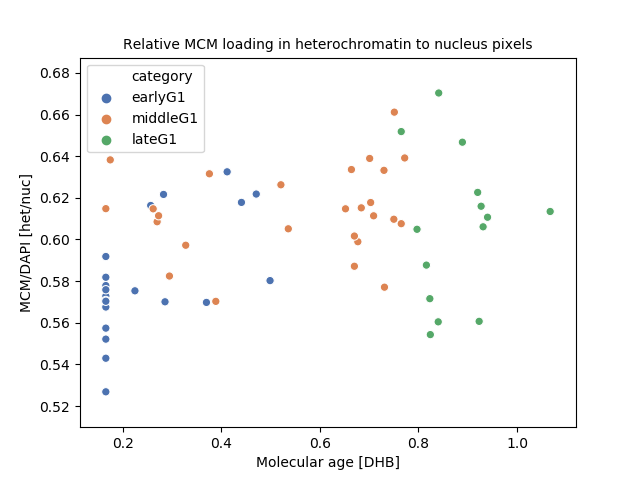

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [46]:
%matplotlib notebook
data2['temp']=(data2.nuc_mcm_het/data2.nuc_DAPI_het)/(data2.nuc_mcm_total/data2.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data2.loc[(['G1' in x for x in data2.category]), :], 
                   hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)


<IPython.core.display.Javascript object>


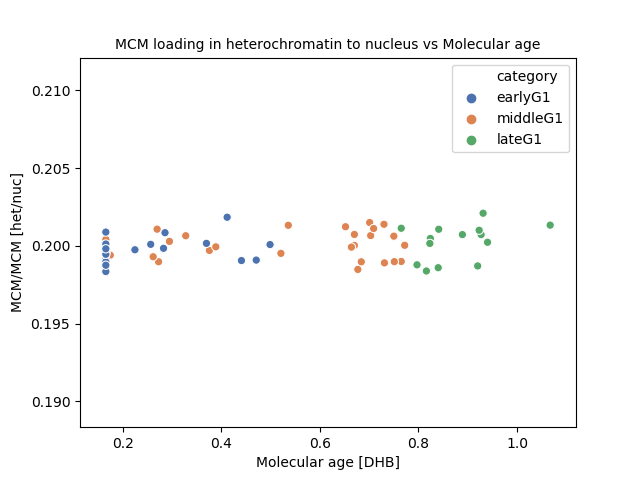

Text(0.5, 1.0, 'MCM loading in heterochromatin to nucleus vs Molecular age')

In [47]:
%matplotlib notebook
data2['temp']=(data2.nuc_mcm_het/data2.nuc_mcm_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data2.loc[(['G1' in x for x in data2.category]), :], 
           hue='category',hue_order=labels,palette='deep')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/MCM [het/nuc]')
plt.title('MCM loading in heterochromatin to nucleus vs Molecular age', fontsize=10)

In [50]:
testfile2=f'{bigDir}\\20200203_new data\\cellinfo_200203_v11_random_20.csv'
testdata2=pd.read_csv(testfile2)
testdata2=testdata2.loc[testdata2.group=='siLuc',:]

<IPython.core.display.Javascript object>


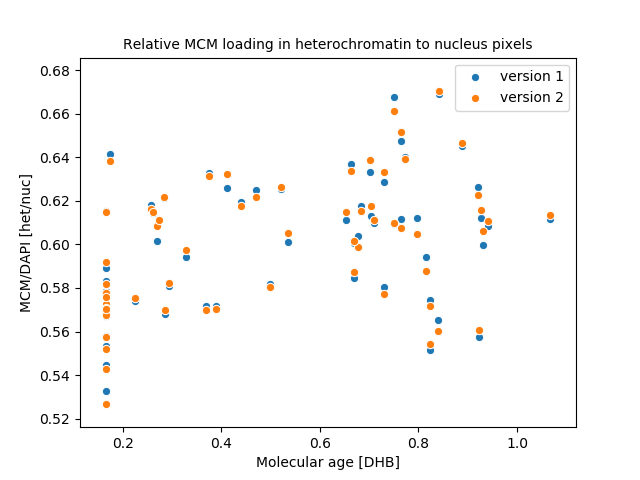

Text(0.5, 1.0, 'Relative MCM loading in heterochromatin to nucleus pixels')

In [51]:
%matplotlib notebook
testdata2['temp']=(testdata2.nuc_mcm_het/testdata2.nuc_DAPI_het)/(testdata2.nuc_mcm_total/testdata2.nuc_DAPI_total)

data2['temp']=(data2.nuc_mcm_het/data2.nuc_DAPI_het)/(data2.nuc_mcm_total/data2.nuc_DAPI_total)
labels = ['earlyG1','middleG1','lateG1']
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=testdata2.loc[(['G1' in x for x in testdata2.category]), :], label='version 1')
ax=sns.scatterplot(x='mol_age_mod',y='temp',data=data2.loc[(['G1' in x for x in data2.category]), :], label='version 2')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('Relative MCM loading in heterochromatin to nucleus pixels', fontsize=10)
